### USC ID  : 8534717045
### NAME   : SRINATH BEGUDEM
### GITHUB: SrinathBegudem

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import export_text
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import statsmodels.api as sm

# 1. Decision Trees as Interpretable Models

# (a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations


In [2]:
diagonsis_Data = pd.read_csv(r'..\data\diagnosis.data', encoding = 'utf-16', sep = '\t', header = None)

In [3]:
diagonsis_Data

,0,1,2,3,4,5,6,7
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [4]:
columns = ['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains', 'Burning of urethra, itch, swelling of urethra outlet', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin']
diagonsis_Data.columns = columns

In [5]:
diagonsis_Data


,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [6]:
mapping = {'yes': 1, 'no': 0}
diagonsis_Data.iloc[:,1:] = diagonsis_Data.iloc[:,1:].replace(mapping)


In [7]:
diagonsis_Data.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",0,1,0,0,0,0,0
1,"35,9",0,0,1,1,1,1,0
2,"35,9",0,1,0,0,0,0,0
3,"36,0",0,0,1,1,1,1,0
4,"36,0",0,1,0,0,0,0,0


In [8]:
"""The data type object in pandas typically indicates that the 
column contains string values or a mixture of different data types 
that cannot be easily categorized."""

data_type = diagonsis_Data['Temperature of patient'].dtype
print("Data type of 'Temperature of patient' column:", data_type)


Data type of 'Temperature of patient' column: object


In [9]:
#changing the values of the column temp of patient into string
diagonsis_Data['Temperature of patient'] = diagonsis_Data['Temperature of patient'].astype(str)
# replace , with .
diagonsis_Data['Temperature of patient'] = diagonsis_Data['Temperature of patient'].str.replace(',', '.')

diagonsis_Data.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


# (b) Build a decision tree on the whole data set and plot it.

In [10]:
# dropping decision variables columns
X = diagonsis_Data.drop(columns=['Nephritis of renal pelvis origin', 'Inflammation of urinary bladder'])
y = diagonsis_Data[['Nephritis of renal pelvis origin', 'Inflammation of urinary bladder']]
X

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet"
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


In [11]:
y

,Nephritis of renal pelvis origin,Inflammation of urinary bladder
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
115,1,0
116,0,0
117,1,0
118,1,0


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[70, 50]\n[61, 59]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[60, 0]\n[20, 40]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[40, 0]\n[0, 40]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[10, 50]\n[41, 19]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[0, 50]\n[31, 19]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[0, 21]\n[21, 0]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[0, 29]\n[10, 19]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[0, 10]\n[10, 0]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

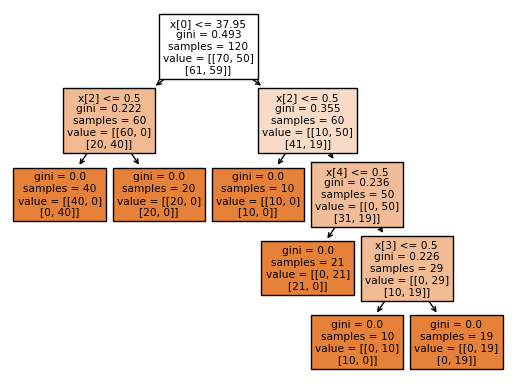

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X.astype(float), y.astype(int))
plot_tree(clf, filled=True)

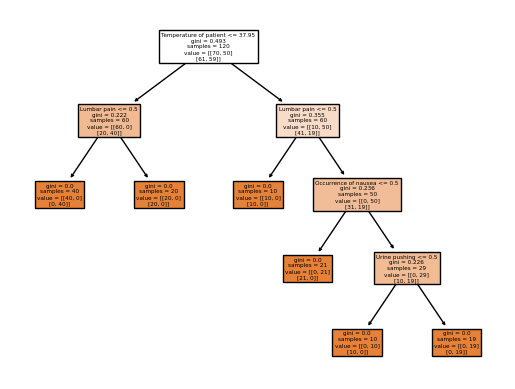

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X.astype(float), y.astype(int))
plot_tree(clf, feature_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet'],filled=True)
plt.show()

# (c) Convert the decision rules into a set of IF-THEN rules.

In [14]:
decision_tree_rules = export_text(clf, feature_names=list(X.columns))
print(decision_tree_rules)

|--- Temperature of patient <= 37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbar pain >  0.50
|   |   |--- class: 0
|--- Temperature of patient >  37.95
|   |--- Lumbar pain <= 0.50
|   |   |--- class: 0
|   |--- Lumbar pain >  0.50
|   |   |--- Occurrence of nausea <= 0.50
|   |   |   |--- class: 1
|   |   |--- Occurrence of nausea >  0.50
|   |   |   |--- Urine pushing <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Urine pushing >  0.50
|   |   |   |   |--- class: 0



In [15]:
def tree_to_convert(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [16]:
tree_to_convert(clf, list(X.columns))


def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [0. 1.]]
    else:  # if Lumbar pain > 0.5
      return [[1. 0.]
 [1. 0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[0. 1.]
 [1. 0.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing <= 0.5:
          return [[0. 1.]
 [1. 0.]]
        else:  # if Urine pushing > 0.5
          return [[0. 1.]
 [0. 1.]]


In [17]:
def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}IF {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}ELSE IF {name} > {threshold:.2f}:")
            recurse(tree_.children_right[node], depth + 1)
        else:
            val = tree_.value[node]
            class_idx = val.argmax(axis=1)[0]
            class_value = tree.classes_[class_idx]
            print(f"{indent}THEN class = {class_value}")

    recurse(0, 0)

In [18]:
tree_to_code(clf, list(X.columns))

IF Temperature of patient <= 37.95:
  IF Lumbar pain <= 0.50:
    THEN class = [0 1]
  ELSE IF Lumbar pain > 0.50:
    THEN class = [0 1]
ELSE IF Temperature of patient > 37.95:
  IF Lumbar pain <= 0.50:
    THEN class = [0 1]
  ELSE IF Lumbar pain > 0.50:
    IF Occurrence of nausea <= 0.50:
      THEN class = [0 1]
    ELSE IF Occurrence of nausea > 0.50:
      IF Urine pushing <= 0.50:
        THEN class = [0 1]
      ELSE IF Urine pushing > 0.50:
        THEN class = [0 1]


# (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet"
42,37.5,0,0,1,1,1
12,36.6,0,1,0,0,0
15,36.7,0,1,0,0,0
114,41.3,1,1,1,1,0
76,40.0,1,1,0,1,0
...,...,...,...,...,...,...
106,41.1,1,1,1,1,0
14,36.7,0,1,0,0,0
92,40.7,1,1,1,1,1
51,37.7,0,0,1,0,0


In [21]:
y_test

,Nephritis of renal pelvis origin,Inflammation of urinary bladder
44,0,1
47,0,1
4,0,0
55,0,1
26,0,1
64,1,0
73,0,0
10,0,1
40,0,0
107,0,0


In [22]:
param_grid = {
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1],
    'max_depth': np.arange(1, 11)
}

dtc = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train.astype(float), y_train.astype(int))

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 4}


In [23]:
best_params['ccp_alpha']

0.001

[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.495\nsamples = 96\nvalue = [[55, 41]\n[49, 47]]'),
 Text(0.2, 0.7, 'x[2] <= 0.5\ngini = 0.225\nsamples = 47\nvalue = [[47.0, 0.0]\n[16.0, 31.0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [[31, 0]\n[0, 31]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[16, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.357\nsamples = 49\nvalue = [[8.0, 41.0]\n[33.0, 16.0]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[8, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.238\nsamples = 41\nvalue = [[0, 41]\n[25, 16]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[16, 0]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.23\nsamples = 25\nvalue = [[0, 25]\n[9, 16]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [[0, 9]\n[9, 0]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

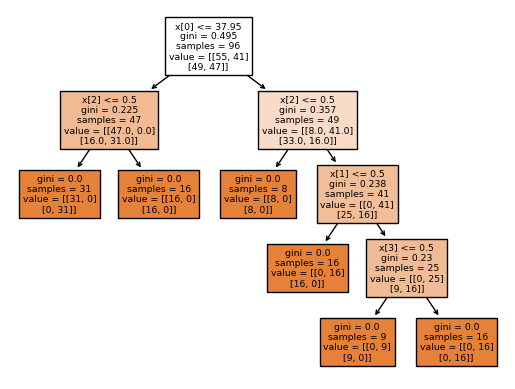

In [24]:
bclf = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=4)
bclf.fit(X_train.astype(float), y_train.astype(float))
plot_tree(bclf, filled=True)

In [25]:
test_accuracy = bclf.score(X_test.astype(float), y_test.astype(int))
print('Test Accuracy:',test_accuracy)

Test Accuracy: 1.0


In [26]:
tree_to_convert(bclf, list(X.columns))

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [0. 1.]]
    else:  # if Lumbar pain > 0.5
      return [[1. 0.]
 [1. 0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[1. 0.]
 [1. 0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[0. 1.]
 [1. 0.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing <= 0.5:
          return [[0. 1.]
 [1. 0.]]
        else:  # if Urine pushing > 0.5
          return [[0. 1.]
 [0. 1.]]


In [27]:
tree_to_code(bclf, list(X.columns))

IF Temperature of patient <= 37.95:
  IF Lumbar pain <= 0.50:
    THEN class = [0. 1.]
  ELSE IF Lumbar pain > 0.50:
    THEN class = [0. 1.]
ELSE IF Temperature of patient > 37.95:
  IF Lumbar pain <= 0.50:
    THEN class = [0. 1.]
  ELSE IF Lumbar pain > 0.50:
    IF Occurrence of nausea <= 0.50:
      THEN class = [0. 1.]
    ELSE IF Occurrence of nausea > 0.50:
      IF Urine pushing <= 0.50:
        THEN class = [0. 1.]
      ELSE IF Urine pushing > 0.50:
        THEN class = [0. 1.]


# 2. The LASSO and Boosting for Regression

### (a) Download the Communities and Crime data3 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime.

In [28]:
crimeData = pd.read_csv('../data/communities.data', sep=",", header=None, na_values = '?')

In [29]:
with open('../data/communities.names', 'r') as names_file:
    lines = names_file.readlines()

column_names = []
for line in lines:
    if '@attribute' in line:
        parts = line.split()
        if len(parts) >= 3:
            column_names.append(parts[1])

In [30]:
crimeData.columns = column_names

In [31]:
crimeData

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


### Use the first 1495 rows of data as the training set and the rest as the test set.¶

In [32]:
train_data = crimeData[:1495]
test_data = crimeData[1495:]

In [33]:
train_data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [34]:
test_data


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17.0,25112.0,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683.0,48952.0,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [35]:
non_predictive_features = ['state', 'county', 'community', 'communityname', 'fold']

all_column_names = crimeData.columns.tolist()

predictive_features = [col for col in all_column_names if col not in non_predictive_features]


In [36]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data[predictive_features])


train_data_imputed = imputer.transform(train_data[predictive_features])
test_data_imputed = imputer.transform(test_data[predictive_features])

train_data_imputed = pd.DataFrame(train_data_imputed, columns=predictive_features)
test_data_imputed = pd.DataFrame(test_data_imputed, columns=predictive_features)

In [37]:
print("train_data After imputation:", train_data_imputed.columns[train_data_imputed.isnull().any()].to_list())
print("test_data After imputation:", test_data_imputed.columns[test_data_imputed.isnull().any()].to_list())


train_data After imputation: []
test_data After imputation: []


### (c) Plot a correlation matrix for the features in the data set.

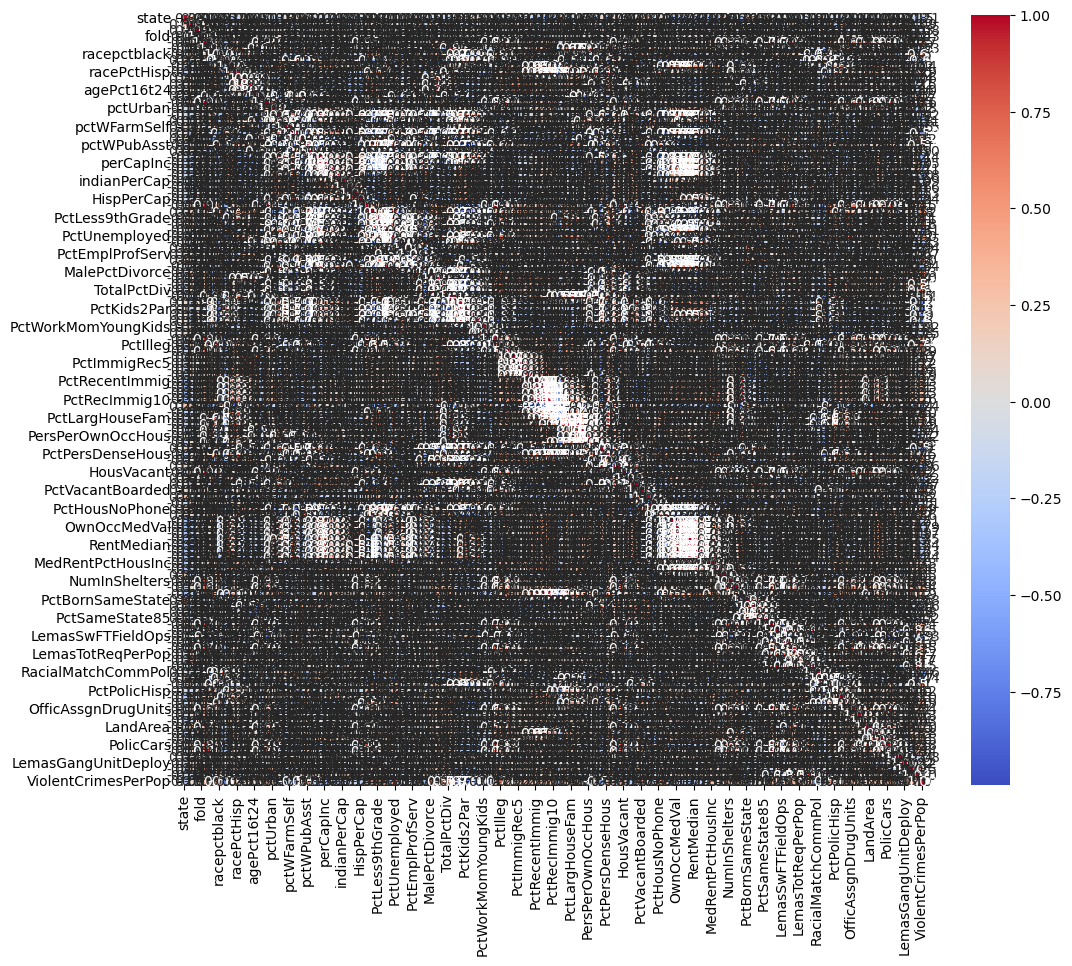

In [38]:

numeric_columns = crimeData.select_dtypes(include=[np.number])


correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


### (d) Calculate the Coefficient of Variation CV for each feature, where CV = ms , in which s is sample standard deviation and m is sample mean..

In [39]:
import pandas as pd


cv_values = pd.DataFrame(columns=["Feature", "CV"])


for feature in predictive_features:
    mean = crimeData[feature].mean()
    std = crimeData[feature].std()
    
    cv = std / mean
    
  
    cv_values.loc[len(cv_values)] = [feature, cv]


print(cv_values)


                 Feature        CV
0             population  2.203503
1          householdsize  0.353298
2           racepctblack  1.410920
3           racePctWhite  0.323782
4           racePctAsian  1.359162
..                   ...       ...
118  LemasPctPolicOnPatr  0.306251
119  LemasGangUnitDeploy  0.921372
120  LemasPctOfficDrugUn  2.555266
121      PolicBudgPerPop  0.844368
122  ViolentCrimesPerPop  0.979015

[123 rows x 2 columns]


### (e) Pick $\sqrt{128}$ features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [40]:
import pandas as pd
import numpy as np


data_frames = []


for feature in predictive_features:
    mean = crimeData[feature].mean()
    std = crimeData[feature].std()
    
    cv = std / mean
    
    
    data_frames.append(pd.DataFrame({"Feature": [feature], "CV": [cv]}))


cv_values = pd.concat(data_frames, ignore_index=True)


cv_values = cv_values.sort_values(by="CV", ascending=False)


num_features_to_select = int(np.floor(np.sqrt(128)))
top_features = cv_values.head(num_features_to_select)


display(top_features)


,Feature,CV
90,NumStreet,4.407702
89,NumInShelters,3.485481
49,NumIlleg,2.994196
51,NumImmig,2.900497
120,LemasPctOfficDrugUn,2.555266
27,NumUnderPov,2.304970
0,population,2.203503
10,numbUrban,2.001744
96,LemasSwornFT,1.984599
108,PctPolicAsian,1.979371


In [41]:
real_features = top_features['Feature'].tolist()

Text(0.5, 1.02, 'Features with highest CV')

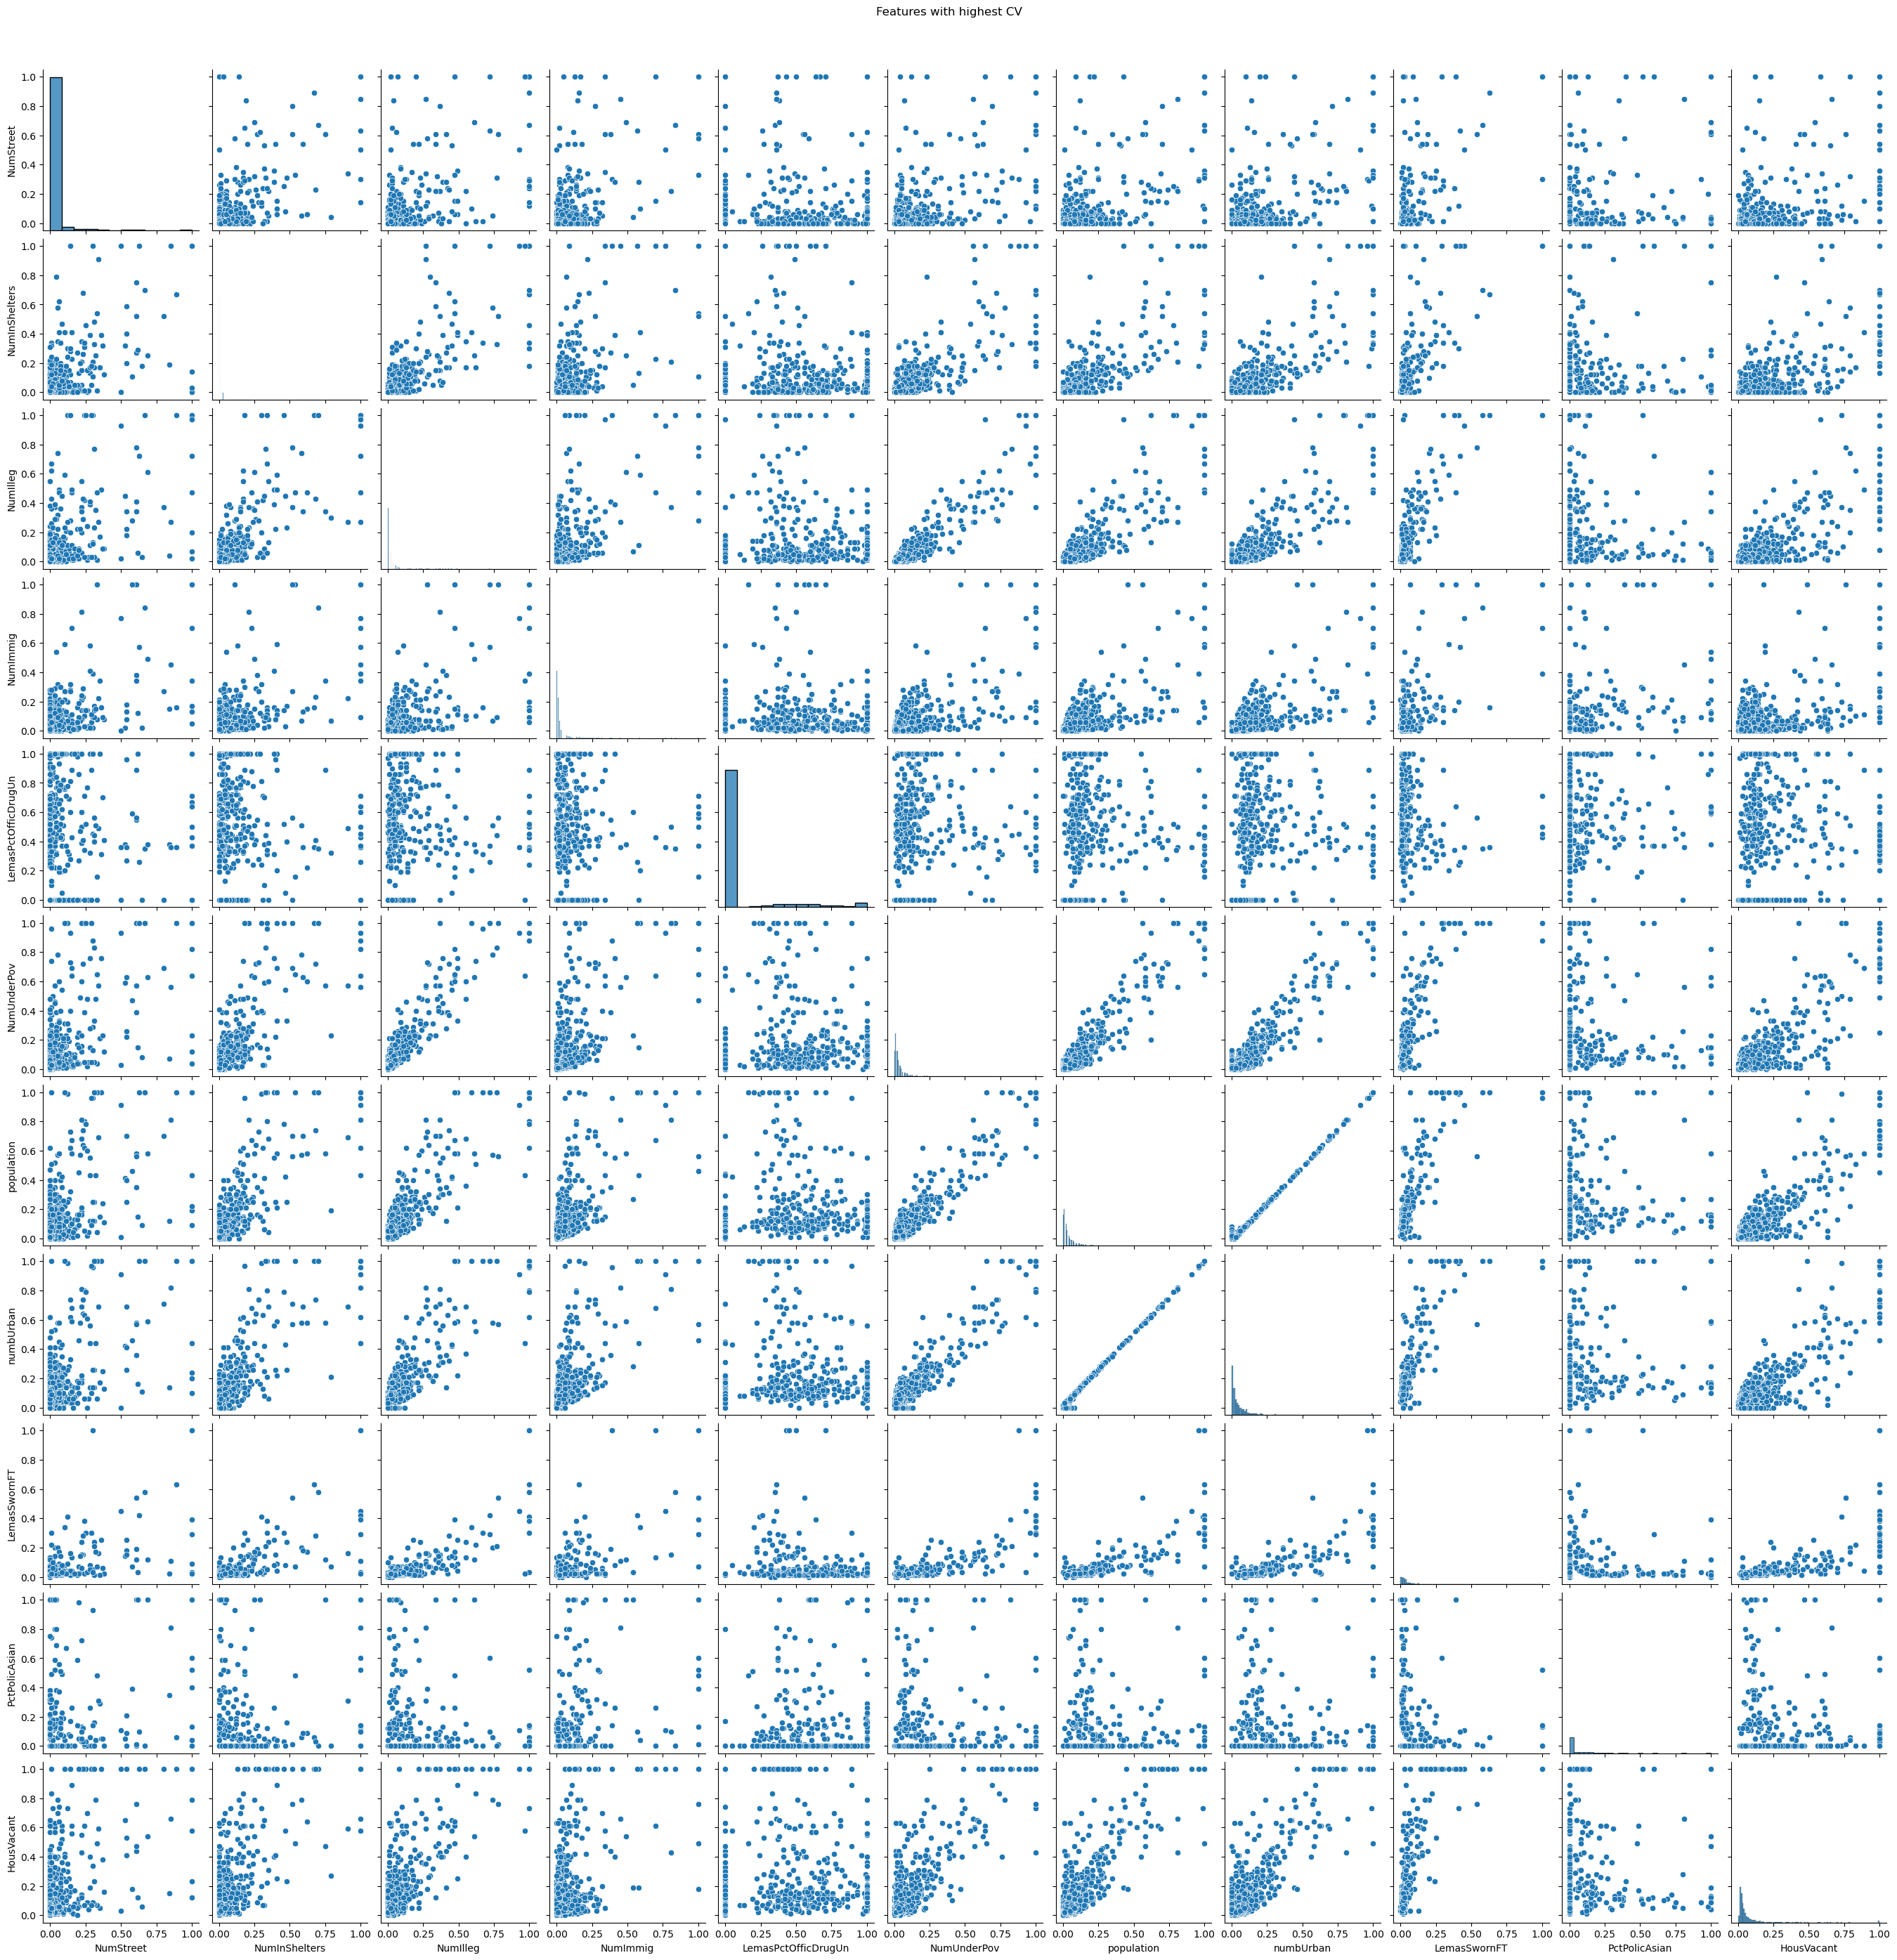

In [42]:
plot = sb.pairplot(data=crimeData[real_features])
plot.fig.suptitle("Features with highest CV", y=1.02)

Text(0.5, 1.0, 'Features with highest CV')

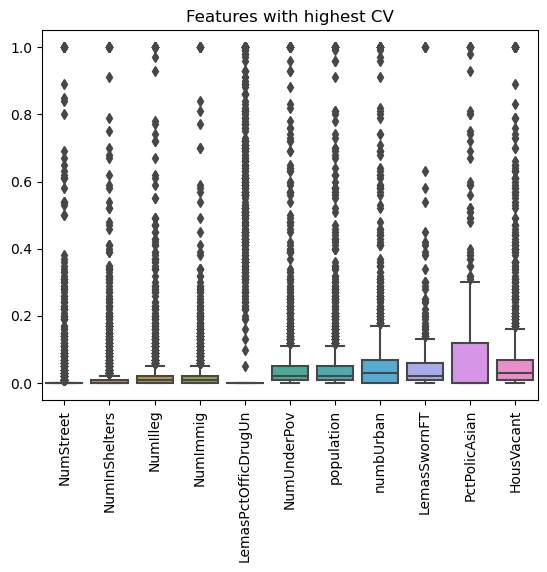

In [43]:
sb.boxplot(data=crimeData[real_features])
plt.xticks(rotation=90)
plt.title("Features with highest CV")

#### Observation:
Evaluating the importance of these features using scatter plots alone can be difficult because of the dense clustering of data points, which can obscure clear patterns. While scatter plots offer a detailed examination of the data, they may not immediately uncover significant insights. In contrast, box plots are more efficient, particularly when handling a large number of data points and multiple groups. They streamline comparisons, facilitating the identification of trends and variations, thus offering a clearer understanding of the data's significance.

### This Dataframe is a way to show the Test Mean Squared Errors of various algorithms used at one place.

In [44]:
test_mse_df = pd.DataFrame(columns=['Algorithm', 'Test_MSE'])

### (f) Fit a linear model using least squares to the training set and report the test error.

In [45]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# Initialize an empty DataFrame
test_mse_df = pd.DataFrame(columns=['Algorithm', 'Test_MSE'])

X_tr = train_data_imputed.drop('ViolentCrimesPerPop', axis=1)
X_te = test_data_imputed.drop('ViolentCrimesPerPop', axis=1)
Y_tr = train_data_imputed['ViolentCrimesPerPop']
Y_te = test_data_imputed['ViolentCrimesPerPop']
X_tr = sm.add_constant(X_tr)

ols_model = sm.OLS(Y_tr, X_tr).fit()

X_te = sm.add_constant(X_te)
Y_pred = ols_model.predict(X_te)

mse = mean_squared_error(Y_te, Y_pred)

# Append the test MSE to the DataFrame using loc method
test_mse_df.loc[len(test_mse_df)] = ['Linear Regression', mse]

print('Mean Squared Error (OLS):', mse)


Mean Squared Error (OLS): 0.01814197113553013


### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [46]:
alphas = [0.1, 1, 10, 100]

ridge_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_model.fit(X_tr, Y_tr)

best_alpha = ridge_model.alpha_

final_model = Ridge(alpha=best_alpha)
final_model.fit(X_tr, Y_tr)

Y_pred = final_model.predict(X_te)

mse = mean_squared_error(Y_te, Y_pred)

# Append the test MSE to the DataFrame using loc method
test_mse_df.loc[len(test_mse_df)] = ['Ridge Regression', mse]

print(f'Optimal Alpha: {best_alpha:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


Optimal Alpha: 1.0000
Mean Squared Error: 0.0177


### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them.


In [47]:
lasso_model = LassoCV(cv=5, random_state=0)
lasso_model.fit(X_tr, Y_tr)
Y_pred = lasso_model.predict(X_te)
mse = mean_squared_error(Y_pred, Y_te)

# Append the test MSE to the DataFrame using loc method
test_mse_df.loc[len(test_mse_df)] = ['Lasso Regression', mse]

print('Mean Squared Error - Non-standardized features:', mse)

selected_features = X_tr.columns[lasso_model.coef_ != 0]

print("Selected Features:")
print(selected_features)


Mean Squared Error - Non-standardized features: 0.017758209216319674
Selected Features:
Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
       'RentLowQ', 'MedRent', 'MedRentP

##### LASSO with standardized features

In [48]:
scaler = StandardScaler()
X_tr_standardized = scaler.fit_transform(X_tr)
X_te_standardized = scaler.transform(X_te)

lasso_model_standardized = LassoCV(cv=5, random_state=0)
lasso_model_standardized.fit(X_tr_standardized, Y_tr)
Y_pred = lasso_model_standardized.predict(X_te_standardized)
mse = mean_squared_error(Y_pred, Y_te)


test_mse_df.loc[len(test_mse_df)] = ['Lasso Regression Standardized', mse]

print('Mean Squared Error - standardized features:', mse)

selected_features = X_tr.columns[lasso_model_standardized.coef_ != 0]

print("Selected Features:")
print(selected_features)


Mean Squared Error - standardized features: 0.01780533927686227
Selected Features:
Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctInc', 'Me

#### Comparision:

The test mean squared errors (MSEs) for both standardized and non-standardized features in the Lasso regression model show minimal difference. While the standardized features exhibit a slightly elevated MSE, the disparity is inconsequential. Nevertheless, employing standardized features offers the benefit of reduced model dimensionality, simplifying feature comparison.








### (i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [49]:
M_values = range(1, X_tr.shape[1] + 1)

mse_scores = []

for M in M_values:
    pca = PCA(n_components=M)
    lr = LinearRegression()
    model = Pipeline(steps=[('pca', pca), ('lr', lr)])

    scores = -cross_val_score(model, X_tr, Y_tr, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(scores.mean())

optimal_M = M_values[mse_scores.index(min(mse_scores))]

pca = PCA(n_components=optimal_M)
lr = LinearRegression()
final_model = Pipeline(steps=[('pca', pca), ('lr', lr)])
final_model.fit(X_tr, Y_tr)

Y_pred = final_model.predict(X_te)

test_mse = mean_squared_error(Y_te, Y_pred)


test_mse_df.loc[len(test_mse_df)] = ['PCA', test_mse]

print(f"Optimal M: {optimal_M}")
print(f"Test Error (Mean Squared Error): {test_mse:.4f}")


Optimal M: 96
Test Error (Mean Squared Error): 0.0185


### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [50]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_tr, Y_tr)

best_alpha = grid_search.best_params_['alpha']

print(f"Optimal α: {best_alpha}")

Optimal α: 1


In [51]:
test_mse_df

,Algorithm,Test_MSE
0,Linear Regression,0.018142
1,Ridge Regression,0.017732
2,Lasso Regression,0.017758
3,Lasso Regression Standardized,0.017805
4,PCA,0.018472


In [52]:
final_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', alpha=best_alpha)
final_xgb_reg.fit(X_tr, Y_tr)
Y_pred = final_xgb_reg.predict(X_te)

test_mse = mean_squared_error(Y_te, Y_pred)

# Create a new DataFrame with the XGBoost results
xgboost_df = pd.DataFrame({'Algorithm': ['XGBoost'], 'Test_MSE': [test_mse]})

# Concatenate the new DataFrame with the existing one
test_mse_df = pd.concat([test_mse_df, xgboost_df], ignore_index=True)

print(f"Test Error (Mean Squared Error): {test_mse:.4f}")


Test Error (Mean Squared Error): 0.0177


### Different algorithms and their corresponding Test MSEs.

In [53]:
test_mse_df

,Algorithm,Test_MSE
0,Linear Regression,0.018142
1,Ridge Regression,0.017732
2,Lasso Regression,0.017758
3,Lasso Regression Standardized,0.017805
4,PCA,0.018472
5,XGBoost,0.017747


In [54]:
# pip freeze > requirements.text